# Info

Setting up the model to recreate the oscillating basin from the non-hydrostatic manual <br>
[Link to the manual](https://oss.deltares.nl/documents/4142077/4199062/non-hydrostatic_report_draft.pdf/eadc1aff-6e19-6e82-2747-3c11c30457ee?t=1624871720408)

In [1]:
# import default modules
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 
from matplotlib import cm
import sys
import os
import subprocess

# Set global constants
PI = np.pi

# method to import xbtools with try routine
try:
    import xbTools
except ImportError:
    print('**no xbTools installation found in environment, adding parent path of notebook to see if it works')
    sys.path.append(r"C:\ERDC\xbeach-toolbox")

**no xbTools installation found in environment, adding parent path of notebook to see if it works


In [2]:
## import xbeach tools
#sys.path.append(os.path.abspath(os.path.join('..' )))

from xbTools.grid.creation import xgrid, ygrid
from xbTools.grid.extension import seaward_extend
from xbTools.xbeachtools import XBeachModelSetup
from xbTools.general.wave_functions import offshore_depth
from xbTools.xbeachpost import XBeachModelAnalysis

In [3]:
# from lib.wave_funcs import calc_wave_number, calc_dispersion_relation

### Data
Generate and plot the bathymetry

In [4]:
# Define model parameters
nx = 16000
model_length = 800

floor_depth = 0.0

# Define your array
array = np.ones(nx+1) * floor_depth

# Specify the filename
filename = 'bed.dep'

# Open the file in write mode
with open(filename, 'w') as file:
    # Write the elements of the array to the file separated by spaces
    file.write(' '.join(map(str, array)) + '\n')

print(f"Array values have been written horizontally to {filename}")


Array values have been written horizontally to bed.dep


In [5]:
# Define your array
array = np.linspace(0, model_length, nx+1)

# Specify the filename
filename = 'x.grd'

# Open the file in write mode
with open(filename, 'w') as file:
    # Write the elements of the array to the file separated by spaces
    file.write(' '.join(map(str, array)) + '\n')

print(f"Array values have been written horizontally to {filename}")


Array values have been written horizontally to x.grd


In [6]:
def get_script_directory():
    try:
        # This will work if the script is run directly
        script_path = os.path.abspath(__file__)
    except NameError:
        # This will work in an interactive environment like Jupyter
        script_path = os.path.abspath('')
    
    return script_path

# Get the folder of the current script
model_dir = get_script_directory()

print("Model directory is: {}".format(model_dir))

Model directory is: c:\ERDC\tutorial_models\solitary_wave\2_sol_wave_nx_16000_tstop_250_CFL_075_2_layer


In [7]:
# Specify the path to your batch file
batch_file = os.path.join(model_dir, r"run_model.bat")

# Run the batch file
try:
    subprocess.run(batch_file, check=True, shell=True)
    print(f"Batch file '{batch_file}' executed successfully.")
except subprocess.CalledProcessError as e:
    print(f"An error occurred while executing the batch file: {e}")

Batch file 'c:\ERDC\tutorial_models\solitary_wave\2_sol_wave_nx_16000_tstop_250_CFL_075_2_layer\run_model.bat' executed successfully.


In [8]:
results = XBeachModelAnalysis(fname = "foo", 
                              model_path=model_dir)

In [9]:
results.set_save_fig(False)
results.set_plot_localcoords(False)
results.set_plot_km_coords(False)

loading variable zs from file


loading variable zb from file
Variable already loaded
Variable already loaded
Variable already loaded
Variable already loaded
Variable already loaded
Variable already loaded
Variable already loaded
Variable already loaded
Variable already loaded
Variable already loaded
Variable already loaded
Variable already loaded


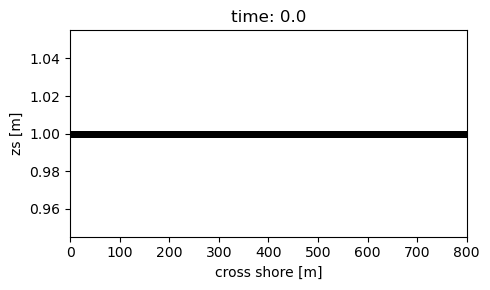

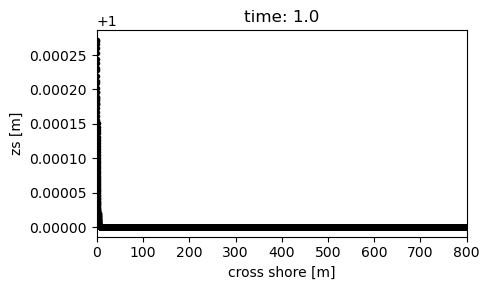

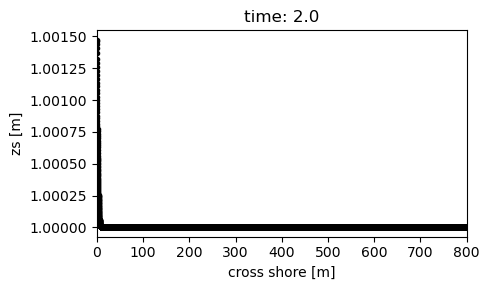

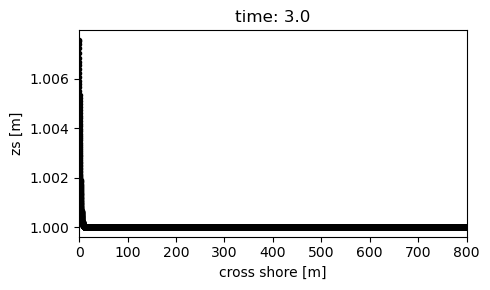

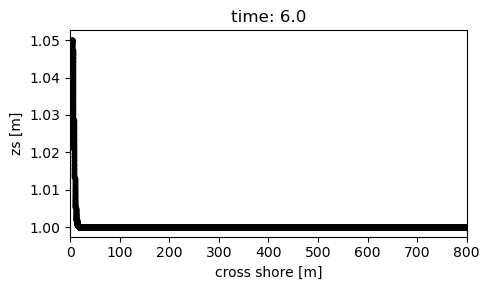

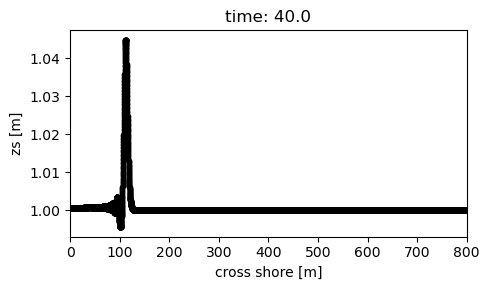

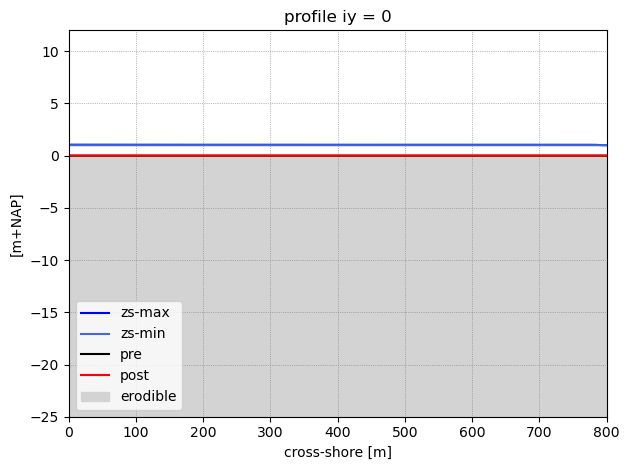

In [10]:
indices = [0, 10, 20, 30, 60, 400]

for index in indices:
    fig, ax = results.fig_cross_var('zs', index, iy=0, coord=None, plot_ref_bathy=False, zmin=-1)

fig, ax = results.fig_profile_change(iy=0)

In [11]:
time = results.var["globaltime"]
zs = results.var["zs"]

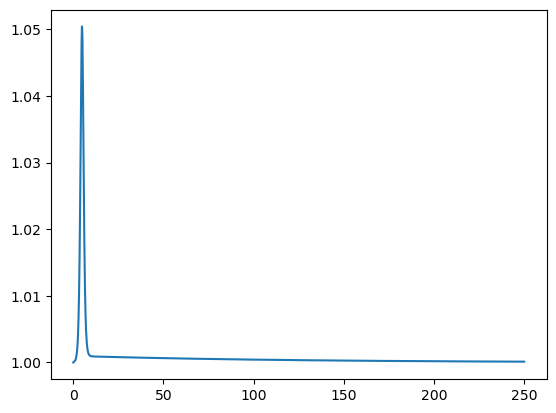

In [12]:
zs_0 = results.var["zs"][:, 0, 0]
plt.plot(time, zs_0)

## Flow Boundary Conditions

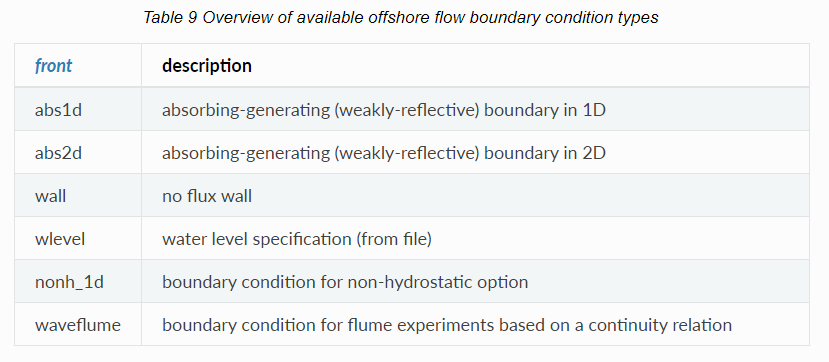

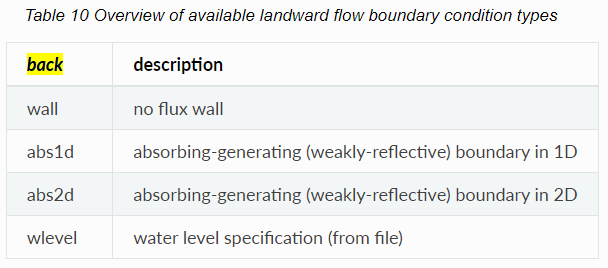

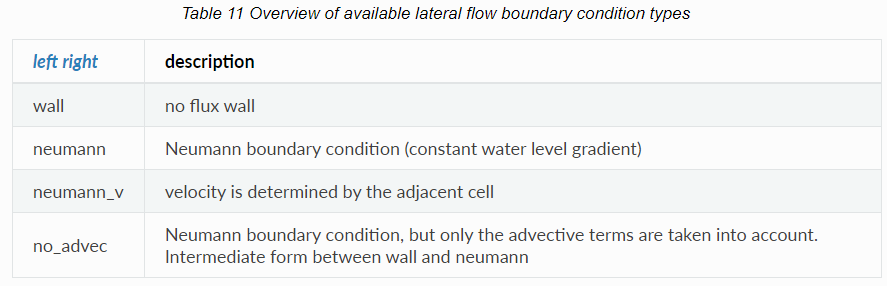

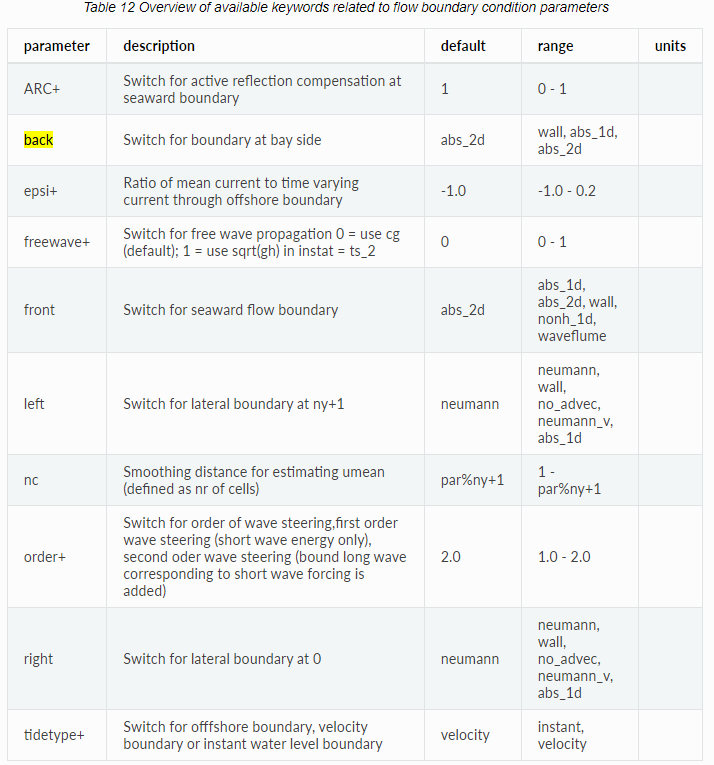